<a href="https://colab.research.google.com/github/Olumide1472/Projects/blob/main/Image_Segmentation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade datasets transformers

In [ ]:
from huggingface_hub import notebook_login
notebook_login()


In [ ]:
!pip install datasets

In [ ]:
# Install required libraries if not already installed
!pip install transformers datasets

In [ ]:
# Import necessary libraries
from transformers import BeitForSemanticSegmentation, BeitImageProcessor
from datasets import load_dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Set up basic configuration for logging to avoid issues
logging.basicConfig(level=logging.INFO)

# Load the dataset
dataset = load_dataset("scene_parse_150", split='train')

# Prepare the image processor and model
processor = BeitImageProcessor.from_pretrained("microsoft/beit-large-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-large-finetuned-ade-640-640")

NameError: name 'logging' is not defined

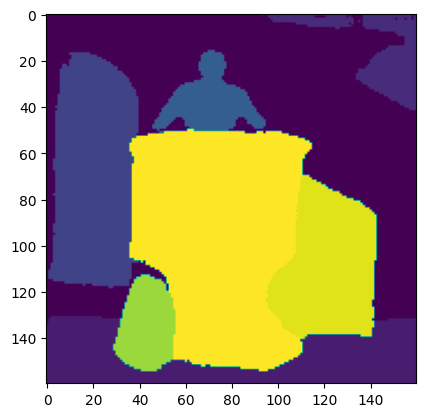

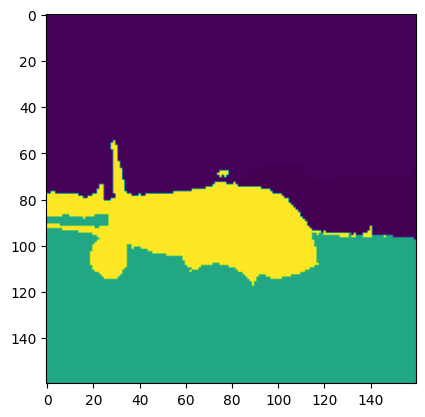

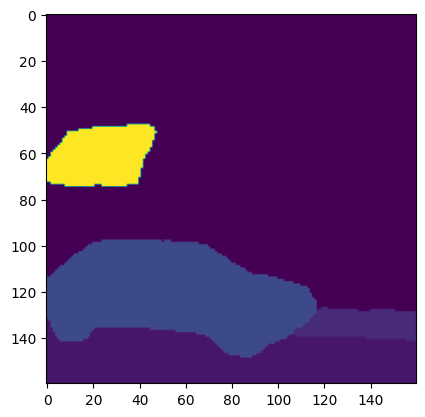

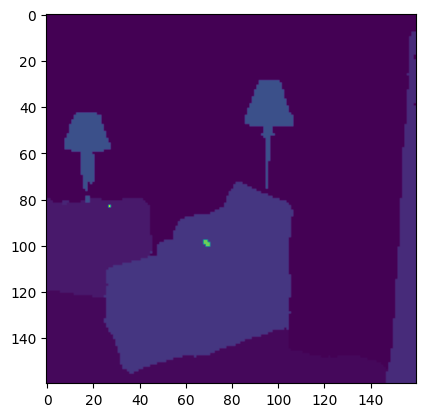

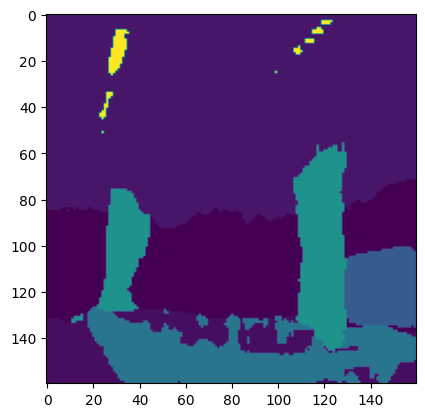

In [ ]:
def prepare_image(image):
    # Image is already a PIL.Image.Image object, just convert to RGB if not already
    image = image.convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    return inputs

def predict_segmentation(inputs):
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits

def display_prediction(logits):
    predictions = torch.argmax(logits, dim=1)
    plt.imshow(predictions[0])
    plt.show()

# Example for a single image (using the first image from the dataset directly)
#image = dataset[0]['image']
#inputs = prepare_image(image)
#logits = predict_segmentation(inputs)
#display_prediction(logits)

# Process and display multiple images
num_images = 5  # Define how many images you want to process
for i in range(num_images):
    image = dataset[i]['image']
    inputs = prepare_image(image)
    logits = predict_segmentation(inputs)
    display_prediction(logits)